# Project 2: The Dijkstra’s Algorithm

## Part (a): Adjacency Matrix 
Suppose the input graph G = (V, E) is stored in an adjacency matrix and we
use an array for the priority queue. Implement the Dijkstra’s algorithm using this
setting and analyze its time complexity with respect to |V| and |E| both
theoretically and empirically. 

## Sample Data


In [1]:
V_data = 5
E_data = [(0, 1, 2), (0, 2, 5), (0, 3, 4), (1, 2, 2), (1, 4, 5), (2, 4, 2), (3, 4, 3)]  # each edge is (start, end, value)

### Priority Queue Data Structure (using array)

In [2]:
class priority_queue_array:
    def __init__(self, length: int):
        self.len = length
        self.arr = [float('infinity')] * length #default - all infinity 
        self.arr[0] = 0
        
    def getQ(self):
        return self.arr
    
    def isempty(self):
        for u in range(self.len) :
            if self.arr[u] != float('infinity') :
                return False
        return True
        
    def pop(self) -> int: #find the one with minimum key val
        min_val = float('infinity')
        position = -1 
        for u in range(self.len) :
            if self.arr[u] < min_val :
                min_val = self.arr[u]
                position = u
        self.arr[position] = float('infinity') #pop it
        return position
        
    def update(self, u, value):
        self.arr[u] = value
        

- The implementation of array for min-priority queue makes it performance worse than heap structure
- Time Complexity yields O(n)

In [3]:
def dijkstra_1(V: int, E: list):
    '''
        No need to keep track of visited vertices since we after visiting a vertex, we 'pop' it from the priority queue
    '''
    # Dijkstra does not work with negative weight edges: assign -1 to denote missing edge between two vertices
    adjMatrix = [[-1] * V for i in range(V)]
    for (sourceVertex, otherVertex, weight) in E:
        adjMatrix[sourceVertex][otherVertex] = weight
        adjMatrix[otherVertex][sourceVertex] = weight
    
    # Initialize array which holds total weight of a path from source vertex to every vertex
    d = [float('infinity')] * V
    d[0] = 0 #source vertex 
 
    pq = priority_queue_array(V)
    #print("   Path Weights \tPriorityQ")
    
    def toUpdatePathWeight(currentV: int, neighbor: int) -> bool:
        return adjMatrix[currentV][neighbor] != -1 and d[currentV] + adjMatrix[currentV][neighbor] < d[neighbor]
    
    while not pq.isempty():
        currentV = pq.pop() # Extract vertex with minimum path weight
        for neighbor in range(V):
            if toUpdatePathWeight(currentV, neighbor):
                d[neighbor] = d[currentV] + adjMatrix[currentV][neighbor]
                pq.update(neighbor, d[neighbor])
        #print(f'{currentV} {d} \t{pq.getQ()}')

    return d

minPathWeights = dijkstra_1(V_data, E_data)

print()
print('Minimum Path Weights:')
for index, pathWeight in enumerate(minPathWeights):
    print(index,':',pathWeight)


Minimum Path Weights:
0 : 0
1 : 2
2 : 4
3 : 4
4 : 6


`Theoretical Time Complexity Analysis`: 
- the while loop would iterate for $V$ times
- within each iteration, it again iterate whole priority_queue_array and the edges of adjacency matrix which cost $O(V)$
- the total time complexity is $O(V^2)$

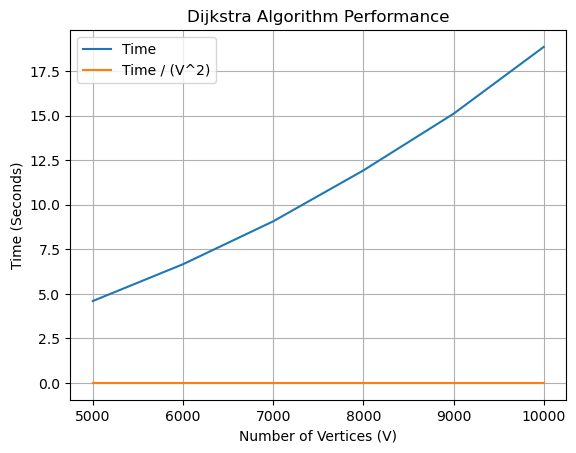

In [21]:
import pandas as pd
import random
import timeit
import matplotlib.pyplot as plt

Vs = [5000, 6000, 7000, 8000, 9000, 10000]
time = []
sigma = []
for V in Vs:
    E = []
    for u in range(0, V - 1):
        E.append((u, u + 1, random.randint(1, 1000)))
    for i in range(10):
        for u in range(1, V):
            E.append((random.randint(0, u - 1), u, random.randint(1, 1000000)))
    start_time = timeit.default_timer()
    dijkstra_1(V, E)
    end_time = timeit.default_timer()
    time.append(end_time - start_time)
    sigma.append((end_time - start_time) / (V * V))

df_V = pd.DataFrame({'V':Vs, 'time':time, 'time / (V^2)':sigma})
df_V

plt.plot(df_V['V'], df_V['time'], label='Time')
plt.plot(df_V['V'], df_V['time / (V^2)'], label='Time / (V^2)')

plt.title('Dijkstra Algorithm Performance')
plt.xlabel('Number of Vertices (V)')
plt.ylabel('Time (Seconds)')

plt.legend()
plt.grid(True)
plt.show()

- Empirically, we found that the runtime divided by $V^2$ is approximately constant, thus the time complexity is positively related to square $V$.

## Part (b): Adjacency List 
Suppose the input graph G = (V, E) is stored in an array of adjacency lists and
we use a minimizing `heap` for the priority queue. Implement the Dijkstra’s
algorithm using this setting and analyze its time complexity with respect to |V|
and |E| both theoretically and empirically. 

In [9]:
import heapq as pq

def dijkstra_2(V, E):
    # store the E into adjacency list
    edge = []
    for i in range(V): 
        edge.append([])
    for (start, end, value) in E :
        edge[start].append((end, value))
    #print(edge)
    # initialize the priority queue
    d = [float('inf')] * V # initialize the distance array with value of infinity
    d[0] = 0
    li = [(0, 0)] #(vertex, path_weight)
    pq.heapify(li) 
    
    visited = [False] * V
    while (True) :
        u = pq.heappop(li)[1] #based on path_weight
        if visited[u] == True : continue
        else : visited[u] = True
        if u == V - 1 : break #last vertex
        for (v, value) in edge[u] : #relax neighbors
            if d[v] > d[u] + value :
                d[v] = d[u] + value
                pq.heappush(li, (d[v], v))
    return d[V - 1]
    
dijkstra_2(V_data, E_data)    

6

- the while loop would iterate for $(V + E)$ times, however each time it only cost $O(\log V)$ to find the minimum distance in the priority_queue_heap. Thus, the total time complexity is $O((V + E) \log V)$

-- <B> empirical time complexity please</B> -- hint, refer to part a 

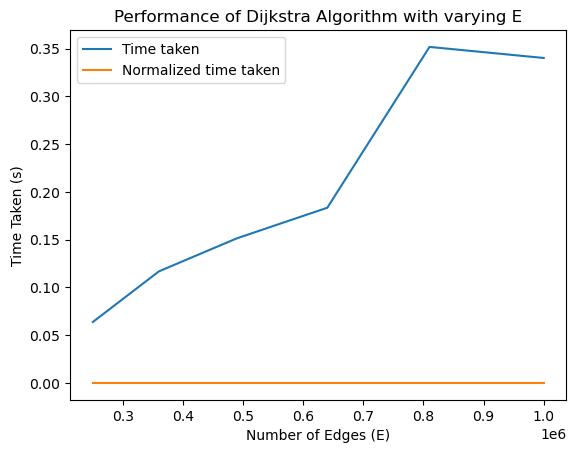

In [13]:
import math
import matplotlib.pyplot as plt

Vs = [500, 600, 700, 800, 900, 1000]
time = []
sigma = []
Es = []
for V in Vs:
    E = []
    count = 0
    for u in range(0, V - 1):
        count += 1
        E.append((u, u + 1, random.randint(1, 100)))
    for i in range(V):
        for u in range(1, V):
            count += 1
            E.append((random.randint(0, u - 1), u, random.randint(1, 10000)))
    Es.append(count)
    start_time = timeit.default_timer()
    dijkstra_2(V, E)
    end_time = timeit.default_timer()
    time.append(end_time - start_time)
    sigma.append((end_time - start_time) / ((V + count) * math.log(count, 2)))

df_E = pd.DataFrame({'E':Es, 'time':time, 'time / ((V + E) * log(V))':sigma})
df_E

# set the x-axis to be 'E'
x = df_E['E']

# plot the time taken for dijkstra_2 algorithm
y = df_E['time']
plt.plot(x, y, label='Time taken')

# plot the normalized time taken for dijkstra_2 algorithm
z = df_E['time / ((V + E) * log(V))']
plt.plot(x, z, label='Normalized time taken')

plt.xlabel('Number of Edges (E)')
plt.ylabel('Time Taken (s)')
plt.title('Performance of Dijkstra Algorithm with varying E')

plt.legend()
plt.show()

### (c) Compare the two implementations in (a) and (b). Discuss which implementation is better and in what circumstances. 

- For (a), the while loop would iterate for $V$ times, each time it would iterate whole priority_queue_array and the edges of adjacency matrix which cost $O(V)$. Thus, the total time complexity is $O(V^2)$
- For (b), the while loop would iterate for $(V + E)$ times, however each time it only cost $O(\log V)$ to find the minimum distance in the priority_queue_heap. Thus, the total time complexity is $O((V + E) \log V)$
- Therefore, when $V << E$, (a) would be better, otherwise (b) would be better.

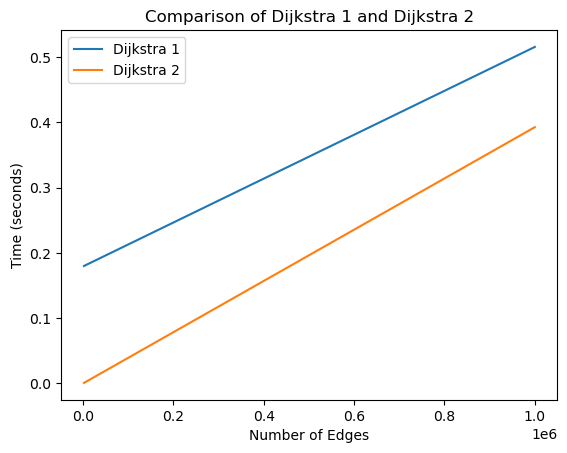

In [20]:
V = 1000
time_1 = []
time_2 = []

#case 1: V>>E
E = []
count_1 = 0
for u in range(0, V - 1):
    count_1 += 1
    E.append((u, u + 1, random.randint(1, 100)))
for u in range(1, V):
    count_1 += 1
    E.append((random.randint(0, u - 1), u, random.randint(1, 100000)))

start_time = timeit.default_timer()
dijkstra_1(V, E)
end_time = timeit.default_timer()
time_1.append(end_time - start_time)

start_time = timeit.default_timer()
dijkstra_2(V, E)
end_time = timeit.default_timer()
time_2.append(end_time - start_time)

#case 2: V<<E
E = []
count_2 = 0
for u in range(0, V - 1):
    count_2 += 1
    E.append((u, u + 1, random.randint(1, 100)))
for i in range(1000):
    for u in range(1, V):
        count_2 += 1
        E.append((random.randint(0, u - 1), u, random.randint(1, 100000)))

start_time = timeit.default_timer()
dijkstra_1(V, E)
end_time = timeit.default_timer()
time_1.append(end_time - start_time)

start_time = timeit.default_timer()
dijkstra_2(V, E)
end_time = timeit.default_timer()
time_2.append(end_time - start_time)

df = pd.DataFrame({"V": [V] * 2, "E": [count_1, count_2], "time_dijkstra_1": time_1, "time_dijkstra_2": time_2})
df
import matplotlib.pyplot as plt
import pandas as pd

# your code for populating df goes here

plt.plot(df["E"], df["time_dijkstra_1"], label="Dijkstra 1")
plt.plot(df["E"], df["time_dijkstra_2"], label="Dijkstra 2")

plt.title("Comparison of Dijkstra 1 and Dijkstra 2")
plt.xlabel("Number of Edges")
plt.ylabel("Time (seconds)")
plt.legend()

plt.show()